In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Reading the big_movies.csv
df_movies = pd.read_csv("big_movies.csv")
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [60]:
#Reading the big_ratings.csv
df_ratings = pd.read_csv("big_ratings.csv")
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [61]:
#big_ratings.csv and big_movies.csv have the same movieId coloumn so we should merge both csv files by that column
df = pd.merge(df_movies, df_ratings, on = "movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [62]:
#Info on the dataset of df
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [63]:
#Creating a Data Frame on the average rating per movie
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [64]:
#Creating a Data Frame that finds the number of ratings per movie
ratings["number_of_ratings"] = df.groupby("title")["rating"].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


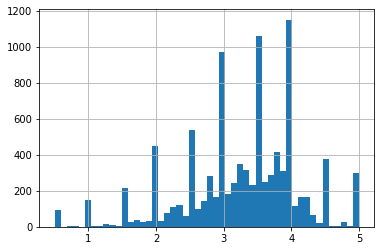

In [65]:
#Histogram on the average rating per movie
ratings["rating"].hist(bins = 50)

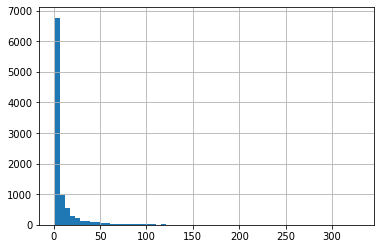

In [66]:
#Histogram on the number of ratings per movie
ratings["number_of_ratings"].hist(bins = 60)

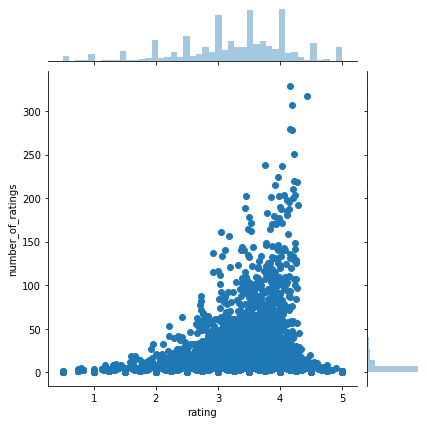

In [67]:
#Finding the Linear Relationship between the average rating and the number of ratings per movie
sns.jointplot(x = "rating", y = "number_of_ratings", data = ratings)

In [72]:
#Building the Recommendation System
movie_matrix = df.pivot_table(index = "userId", columns = "title", values = "rating")
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Sorting the most rated movies 
ratings.sort_values("number_of_ratings", ascending = False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [77]:
#Recommending Forrest Gump to the user based on the user's watch history
FG_user_rating = movie_matrix["Forrest Gump (1994)"]
FG_user_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [78]:
#Recommeding Pulp Fiction to the user based on the user's watch history
PF_user_rating = movie_matrix["Pulp Fiction (1994)"]
PF_user_rating.head()

userId
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [76]:
#Correlating Forrest Gump's ratings compared to other movies
similar_to_Forrest_Gump = movie_matrix.corrwith(FG_user_rating)
similar_to_Forrest_Gump.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [75]:
#Correlating Pulp Fiction's ratings compared to other movies
similar_to_Pulp_Fiction = movie_matrix.corrwith(PF_user_rating)
similar_to_Pulp_Fiction.head()

title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [81]:
#Movie Matrix had to many NaN values so we have to transform the correlation results into dataframes(Forrest Gump Ratings)

corr_FG = pd.DataFrame(similar_to_Forrest_Gump, columns = ["correlation"])
corr_FG.dropna(inplace = True)
corr_FG.head()

,correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [79]:
#Movie Matrix had to many NaN values so we have to transform the correlation results into dataframes(Pulp Fiction Ratings)
corr_PF = pd.DataFrame(similar_to_Pulp_Fiction, columns = ["correlation"])
corr_PF.dropna(inplace = True)
corr_PF.head()

,correlation
title,
"'burbs, The (1989)",-0.187323
(500) Days of Summer (2009),-0.044034
*batteries not included (1987),-0.738549
...And Justice for All (1979),-0.188982
10 Cent Pistol (2015),1.000000


In [82]:
#Setting Threshold for the number of ratings since of the movies have very few ratings(Forrest Gump Ratings)
corr_FG = corr_FG.join(ratings["number_of_ratings"])
corr_FG.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [83]:
#Setting Threshold for the number of ratings since of the movies have very few ratings(Pulp Fiction Ratings)
corr_PF = corr_PF.join(ratings["number_of_ratings"])
corr_PF.head()

,correlation,number_of_ratings
title,,
"'burbs, The (1989)",-0.187323,17
(500) Days of Summer (2009),-0.044034,42
*batteries not included (1987),-0.738549,7
...And Justice for All (1979),-0.188982,3
10 Cent Pistol (2015),1.000000,2


In [84]:
#Obtaining the movies that are similar to Forrest Gump
corr_FG[corr_FG["number_of_ratings"] > 100].sort_values(by = "correlation", ascending = False).head(10)

,correlation,number_of_ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125
Braveheart (1995),0.416976,237
Ferris Bueller's Day Off (1986),0.405830,109
Mrs. Doubtfire (1993),0.401408,144
Full Metal Jacket (1987),0.397241,102


In [85]:
#Obtaining the movies that are similar to Pulp Fiction
corr_PF[corr_PF["number_of_ratings"] > 100].sort_values(by = "correlation", ascending = False).head(10)

,correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
"Usual Suspects, The (1995)",0.411700,204
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.402193,120
Eternal Sunshine of the Spotless Mind (2004),0.401534,131
Reservoir Dogs (1992),0.394687,131
